original code: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<순서>
1. Exploratory Data Analysis(EDA)
2. Feature Engineering and Data Cleaning
3. Predictive Modeling
4. Hyperparameter Tuning
5. Ensembling
6. Feature Importance

## 1. Exploratory Data Analysis(EDA)

#### EDA란 무엇인가?
>탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 데이터 과학자들이 데이터 세트를 분석하고 조사하면서 데이터의 주요 특징을 시각화하는 방법으로 요약하는 데 널리 사용됩니다. 데이터 과학자가 데이터 패턴, 스팟 이상, 가설 테스트 및/또는 가정을 발견하는 데 도움이 됩니다. 따라서 간단히 말해서 데이터 과학자가 목표로 필요한 답을 얻기 위해 주어진 데이터 소스를 조작하는 최선의 방법을 결정하는 데 도움이 되는 방법으로 정의할 수 있습니다. (https://wikidocs.net/185338)

#### Recommended EDA steps (https://wikidocs.net/185338)
1) Data Collection
2) Finding all Variables and Understanding Them
3) Cleaning the Dataset
4) Identify Correlated Variables
5) Choosing the Right Statistical Methods
6) Visualizing and Analyzing Results

#### 이번 EDA 분석에서는...
- 위의 step을 전부 따라가지는 않는다.
- Original code의 분석 순서와 위의 step을 절충하여 아래와 같은 순서로 진행한다.
    1. Data Collection
    2. Variables analysis
        - Identify Correlated Variables 포함
    3. Cleaning the Dataset
        - Null data 제거

### 1-1. Data Collection

In [2]:
data=pd.read_csv('../input/train.csv') #Load data
data.head() #Print 1st~5th lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1-2. Variable analysis
- 먼저 전체 feature에서 null 데이터를 가진 feature를 확인한다.
- Label 'Survived'를 확인한다.
- Label과 관련있어 보이는 feature들을 확인한다.
    - 'Sex': 성별
    - 'Pclass': 객실등급
    - 'Age': 나이
    - 'Embarked': 승선항구
    - 'SibSp': 함께 탑승한 가족
    - 'Parch': 함께 탑습한 부모-자식

#### Null 데이터 확인

In [3]:
data.isnull().sum() #Summarize null values of data table

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 'Age', 'Cabin', 'Embarked' 3개의 feature에서 null data 존재 확인

#### Target variable(label) 데이터 확인
- 'Survived' <- label
- EDA 분석법에 따라 label을 시각화하고 이해해본다.

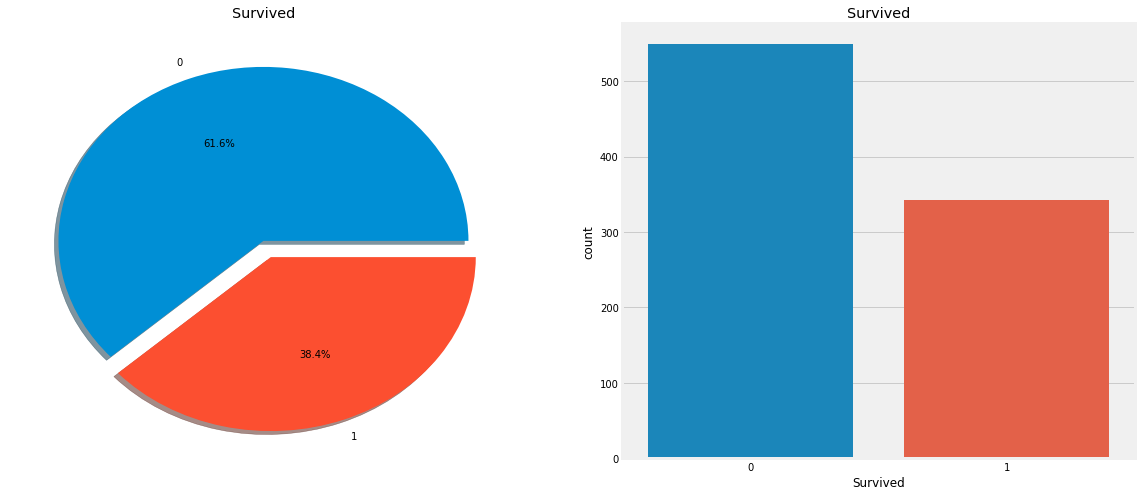

In [4]:
#Visualize the target label 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',
              data=data,
              ax=ax[1])
ax[1].set_title('Survived')

plt.show()

- Survival rate를 각각 piplot, histogram으로 나타냈다.
- Survival rate: 38.4%

#### 'Sex' feature 확인
- Categorial feature

In [5]:
#survival rate by 'Sex'
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

-  여성의 경우 233명이 생존, 81명 사망
-  남성의 경우 109명이 생존, 468명 사망
-  즉, 명확한 경향을 보이고 있다: 여성의 생존율이 더 높음

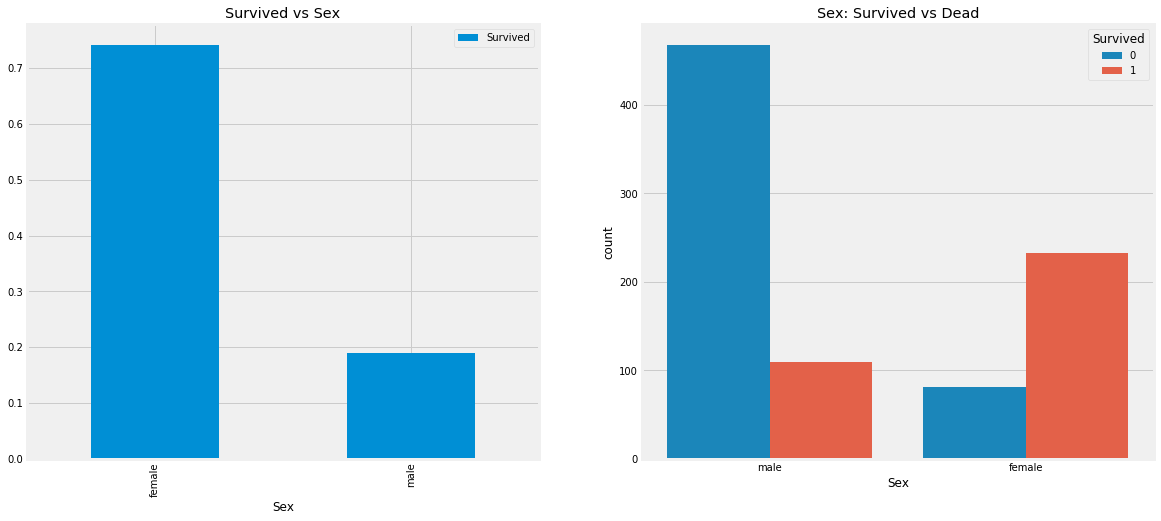

In [6]:
#Visualize the categorial feature 'Sex' in relation to the label 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 탑승자의 수를 비교하였을 때, 남성이 더 많이 탑승하였다.
- 그럼에도 불구하고, 남성에서의 사망율이 여성의 사망율보다 훨씬 높게 나왔다.

#### 'Pclass' feature 확인
- Ordinal feature

In [7]:
#Analyze the ordinal feature 'Pclass'
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 등급별 사망수를 보았을 때, 3등급 객실에서 사망자 수가 제일 높았다.
- 등급별 생존자를 보았을 때, 1등급 객실에서 생존자 수가 제일 높았다.

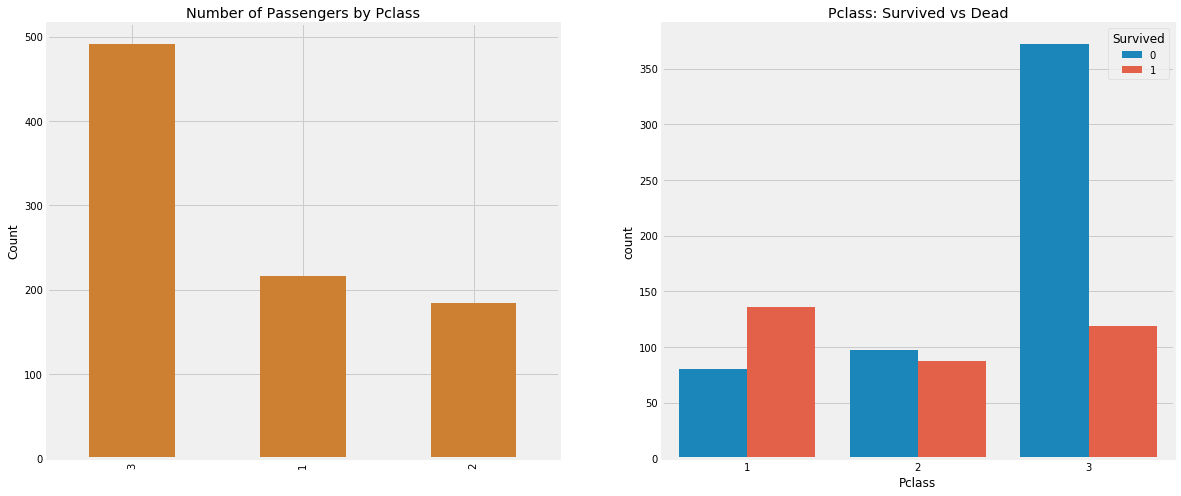

In [8]:
#Visualize the categorial feature 'Pclass'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

#relation to the target label 'Survived'
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

- 3등급 객실에서 가장 많은 사람들이 묵었다.
- 객실 등급 사이의 생존율을 보았을 때, 1등급에서는 생존율이 사망율보다 높다.
- 2등급에서는 생존율이 사망율보다 근소하게 낮다.
- 3등급에서는 생존율이 사망율보다 매우 낮다.
- 따라서 객실등급과 생존율은 유효한 상관관계를 가지는 것으로 보인다.

#### 'Sex', 'Pclass' feature 동시에 비교

In [9]:
#Analyze the features 'Sex' and 'Pclass' together
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

0.8.1


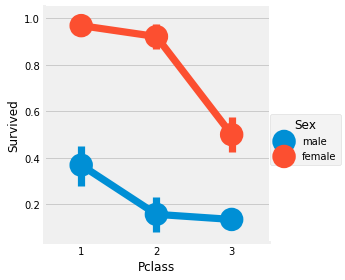

In [10]:
#Analyze the features 'Sex' and 'Pclass' together
print(sns.__version__)
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- 생존율이 가장 높은 그룹은 '여성'-'1등급'
- 생존율이 가장 낮은 그룹은 '남성'-'3등급'

#### 'Age' feature 확인
- Continuous feature
- 승객의 나이에 대한 데이터
- Continuous feature는 categorial, ordinal feature와 달리 실수를 범위로 가지므로, 분석접근 또한 달라져야 한다.

In [11]:
#Analyze the continuous feature 'Age'
print(f"oldest passenger: {data['Age'].max()}")
print(f"youngest passenger: {data['Age'].min()}")
print(f"passenger average: {data['Age'].mean()}")

oldest passenger: 80.0
youngest passenger: 0.42
passenger average: 29.69911764705882


- 먼저 'Age' feature의 실수값 범위를 이해하기 위해 최댓값, 최솟값, 그리고 중간값을 파악

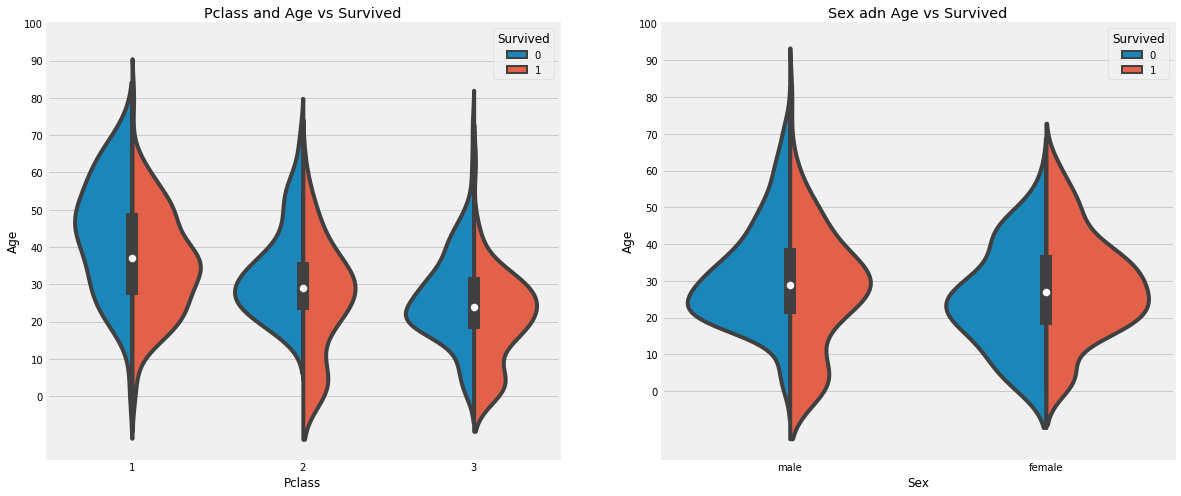

In [12]:
#Visualize the features Age' in relation to the features 'Pclass' and 'Sex', with the target label 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#continuous data -> violin plot
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex adn Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- Violin plot으로 'Age' feature 표현
- 관찰을 통해 다음의 사실을 관찰할 수 있다.
    - 2등급과 3등급에서 10대 이하의 생존율이 사망율보다 높다
    - 2등급과 3등급에서 20-30대 사망율이 높다
    - 1등급에서 20-40대의 생존율은 높은 편이다. 특히 30대 중반에서 생존율이 제일 높다.

#### 'Embarked' feature 분석
- Categorial feature
- 승선 장소에 대한 데이터
- 카테고리 데이터로 연관성이 있는지 확인해본다.


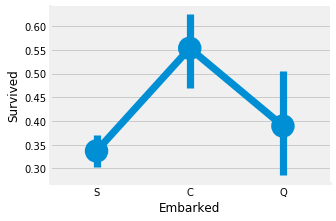

In [13]:
#Visualize the feature 'Embarked' in relation to the target label 'Survived'
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)

plt.show()

- 항구 C에서 생존율이 높았다.

#### 'Sex', 'Embarked', 'Pclass' feature 동시에 확인
- 어느 항구에서 어떤 성별의 사람들이 어느 객실등급에 승선했는지 확인하고, 이들의 생존사망 여부를 같이 확인한다.

In [14]:
#Analyze the categorial features 'Embarked' with 'Sex' and 'Pclass' features for the target label 'Survived'
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

- 뚜렷한 경향은 보이지 않으나, 3등급 객실의 남성이 가장 많이 사망했음을 알 수 있다.
- 히스토그램으로 관계를 다시 본다

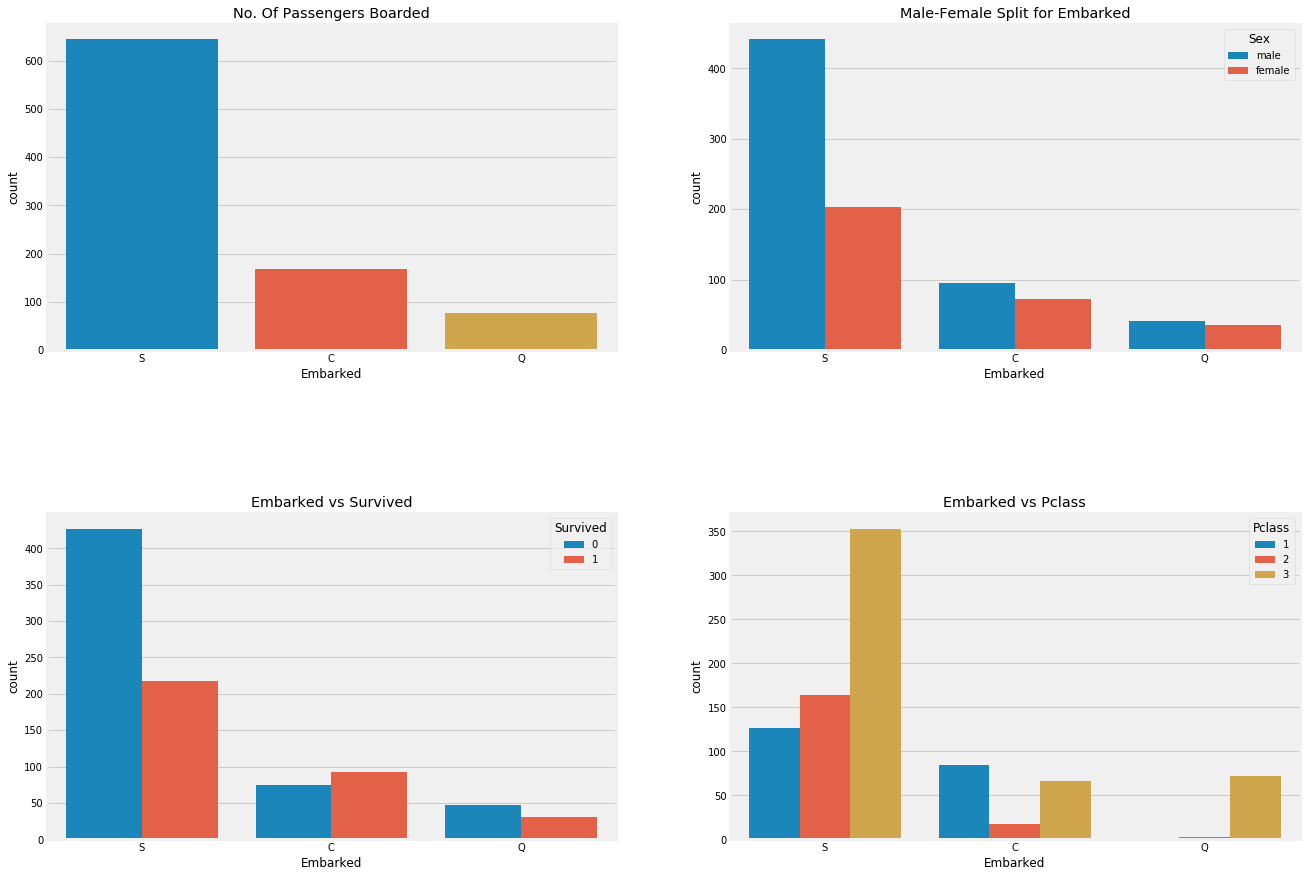

In [15]:
#Visualize the each categories of the feature 'Embarked' with other features and target label again
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S에서 가장 승선 수가 많았다.
- C에서 유일하게 생존율이 더 높았다.

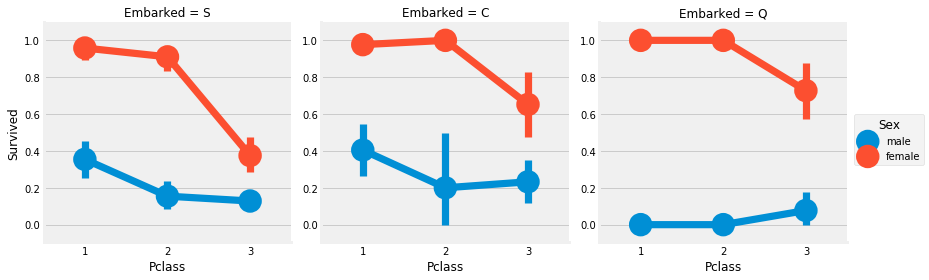

In [16]:
#Visualize the each categories of the feature 'Embarked' with other features and target label again
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- 여성의 생존율은 승선항구와 상관없이 항상 높았다.
- 3등급 객실 여성의 생존율은 S항구에서 승선한 경우 많이 낮았다.

#### 'SibSp' features 확인
- Discrete feature
- 함께 탑승한 가족의 수

In [17]:
#Analyze the discrete feature 'SibSp' in realtion to the target label 'Survived'
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


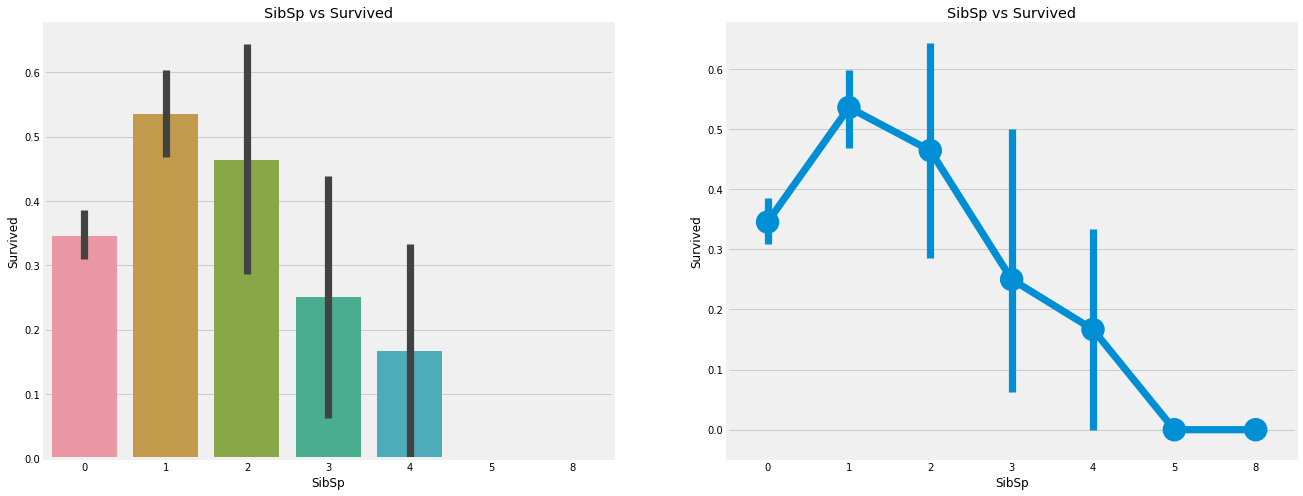

In [18]:
#Visualize the feature 'SibSp'
f,ax=plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

- 자녀가 5명이 넘어가면 생존율은 없었다.
- 2~3명의 자녀와 탑승한 경우 생존율이 혼자인 경우보다 올라갔다.

In [19]:
#Analyze the discrete feature 'SibSp' and 'Pclass'
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### 'Parch' feature 확인
- Discrete feature
- 부모-자식이 함께 탑승한 경우

In [20]:
#Analyze the feature 'Parch'
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


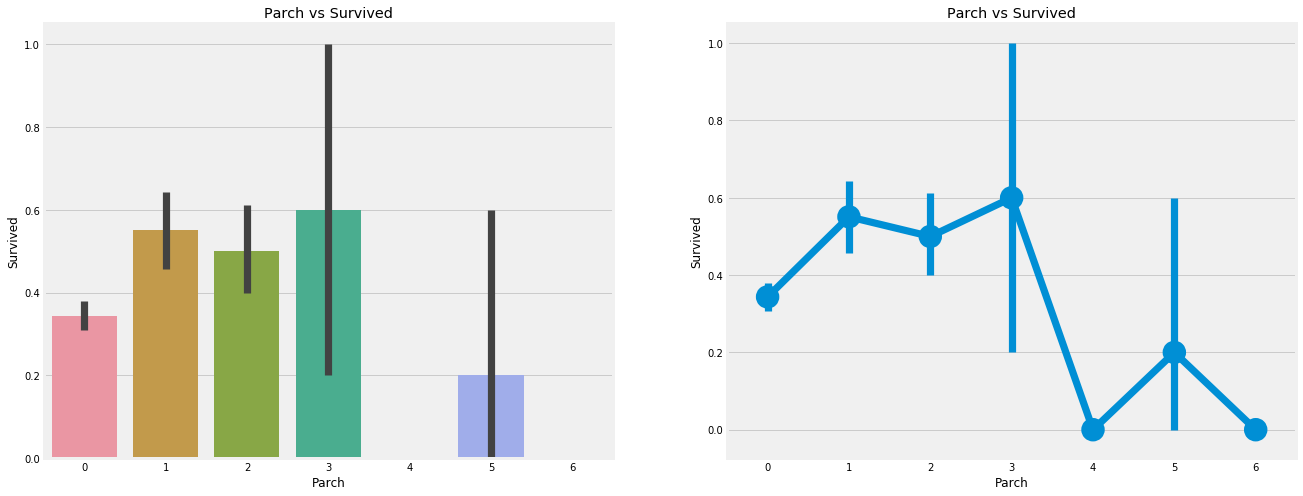

In [21]:
#Visualize the feature 'Parch' with 'Survived'
f,ax=plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

- 역시 혼자보다는 가족이 있는 경우 생존율이 올라갔다.
- 3명 이상의 가족이 생존율이 가장 높았다.
- 4명 이상의 가족은 생존율이 없었다.
- 5명 이상인 가족은 생존율이 다시 올라갔다.

#### 'Fare' feature 분석
- Continuous feature
- 요금을 얼마나 지불했는지에 대한 데이터
- Continuous feature이므로 최대, 최소, 중간값을 확인하는 것으로 시작한다.

In [22]:
#Analyze the continuous feature 'Fare'
print(f"Highest fare: {data['Fare'].max()}")
print(f"Lowest fare: {data['Fare'].min()}")
print(f"Fare Average: {data['Fare'].mean()}")

Highest fare: 512.3292
Lowest fare: 0.0
Fare Average: 32.2042079685746


- 'Fare'와 가장 연관이 있어보이는 'Pclass' feature와 함께 비교하여 본다.

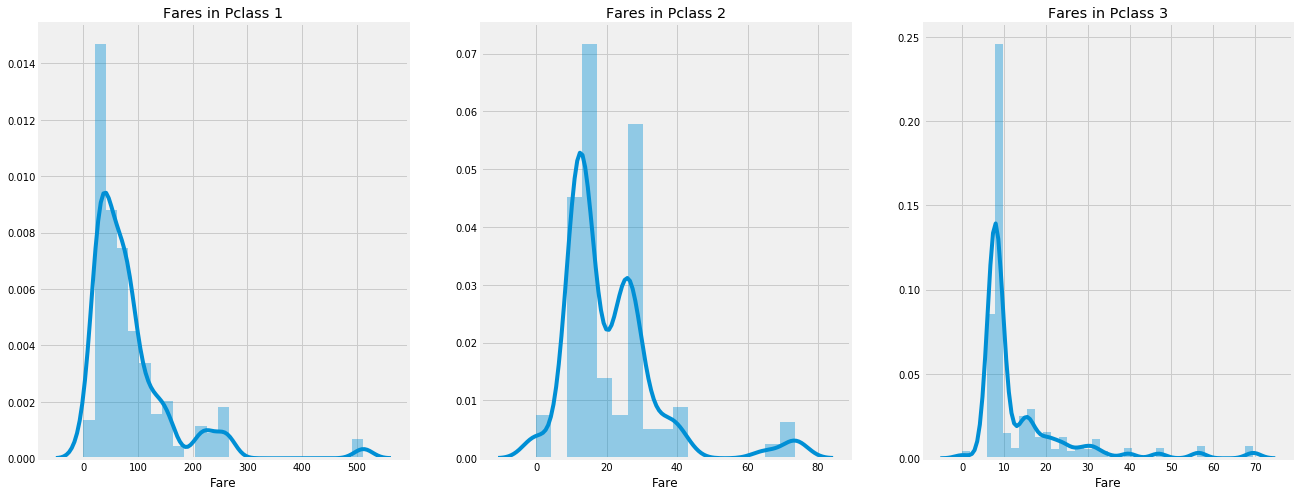

In [23]:
#Visualize the feature 'Fare' and 'Pclass'
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

#### label, 전체 feature 비교
- 모든 데이터를 한번에 heatmap으로 비교해본다.
- 이를 통해 데이터 사이의 상관관계를 한 눈에 볼 수 있다.

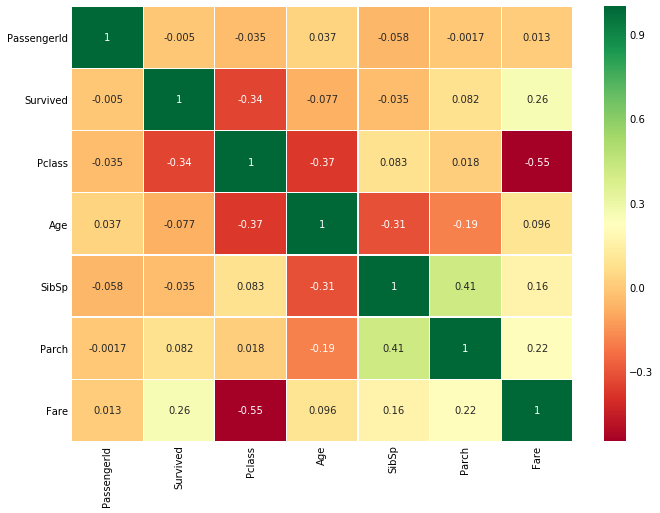

In [24]:
#Visualize features above to a heatmap plot
sns.heatmap(data.corr(),
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

- 'Parch'-'SibSp': 0.41 <- 가장 연관이 높지만, 이는 두 데이터가 어느정도 중복되기 때문.
- 'Pclass'-'Fare': -0.55 <- 가장 연관이 낮지만, 이는 등급 숫자가 적을수록 좋은 등급이기 때문.
- 'Survived' <- 'Fare'와 가장 연관이 높음

### 1-3. Cleaning the Dataset
#### 'Age' null data
- 'Age' 데이터에서 결측치를 제거하자.
- 'Age'가 결측된 데이터는 모두 지워야 하는가? -> no
- 대신, 다른 feature를 바탕으로 나이를 최대한 추정하여 반영!
    - 'Initial' 데이터를 참조
        - 이름 앞에 붙는 호칭으로, 성별을 알 수 있기 때문에 성별에 따른 평균나이를 활용.
    - 순서
        1. 'Initial' 데이터가 난잡하므로, 이를 잘 정리한다
        2. 정리된 'Initial' 카테고리에 따른 평균 나이를 반영한다.

In [25]:
#To do feature engineering(remove null data of 'Age'), check the 'Initial' feature
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 서로 다른 호칭들이 여러 개 존재하는데, 그 수가 1~6개 정도인 희귀한 호칭들을 흔한 호칭들로 묶자.
- 데이터 수가 많은 Master, Miss, Mr, Mrs를 보존하는 방향으로 한다.
- 희귀한 호칭들은 Miss, Mr, 혹은 Other로 묶는다.

In [26]:
#Group the rare initials to common initials
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], \
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], \
                        inplace=True)

- 이제 '호칭'들에 대한 평균 나이를 계산한다.
- 평균 나이는 결측치 데이터를 대체할 것이다.

In [27]:
#Check the average 'Age' of each 'Initial'
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [28]:
#Feature engineering: fill the null values of 'Age' based on their 'Initial'
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age'] = 46

In [29]:
#Check the null valuesof 'Age'
data.Age.isnull().any()

False

- '나이' 데이터에서 결측치가 모두 제거되었음을 확인.

#### 'Age' feature 재분석
- Null data가 제거된 'Age' feature에 대해, label과의 관계를 살펴본다.

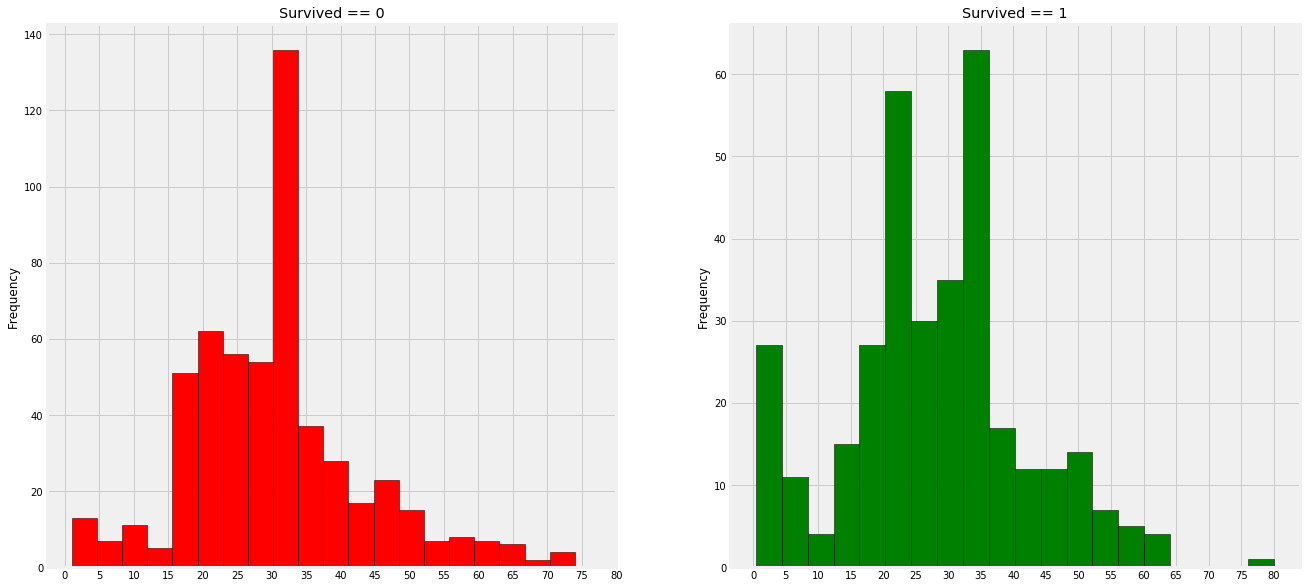

In [30]:
#Visualize the feature 'Age' divided by survived and dead
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived == 0')
ax[0].set_xticks(range(0, 85, 5))

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived == 1')
ax[1].set_xticks(range(0, 85, 5))

plt.show()

- 30-35세 사망율이 높다
- 5세 이하의 생존율은 높다

#### 'Age'-'Pclass'-'Initial' 확인
- 생존율이 높은 그룹의 나이, 객실등급, 호칭을 가늠해보자.

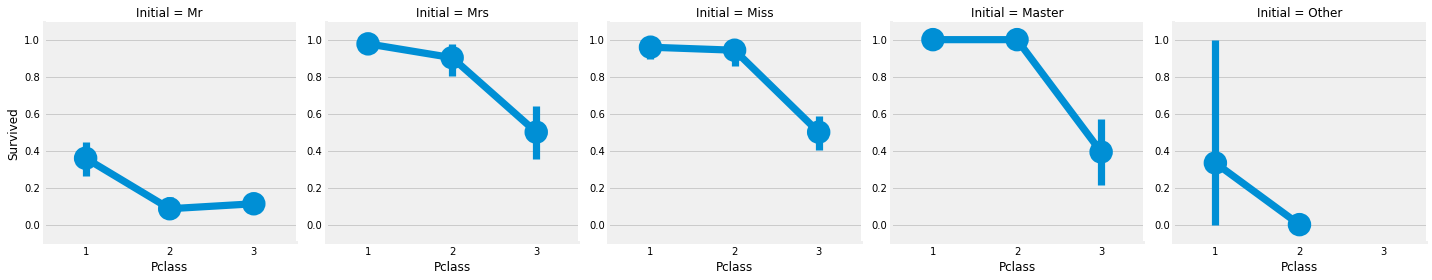

In [31]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

- 첫 세 개의 그래프를 보아 여성과 유아가 우선적으로 구조 대상이었음을 확인할 수 있다.

#### 'Embarked' null data
- 'Embarked' 데이터에서 결측치를 제거하자.
- 평균적으로 S에서 가장 많이 탑승했으므로, 탑승정보가 없는 고객들은 S에서 탑승했다고 추정한다.

In [32]:
#Feature engineering: fill the null value of 'Embarked'
#port S is the major boarding place
data['Embarked'].fillna('S', inplace=True)

In [33]:
#Check null data from 'Embarked'
data.Embarked.isnull().any()

False

## 2. Feature Engineering and Data Cleaning
#### Feature Engineering
>All machine learning algorithms use some input data to generate outputs. Input data contains many features which may not be in proper form to be given to the model directly. It needs some kind of processing and here feature engineering helps.
>
>Feature engineering fulfils mainly two goals:
>
>It prepares the input dataset in the form which is required for a specific model or machine learning algorithm.
>
>Feature engineering helps in improving the performance of machine learning models magically.
>
>(https://www.analyticsvidhya.com/blog/2021/09/complete-guide-to-feature-engineering-zero-to-hero/)

- 데이터가 머신러닝 모델의 문제를 잘 표현할 수 있도록 feature를 조정한다.
- Binning: categorial feature로 변환한다.


#### 'Age' feature: categorial feature로 변환

In [34]:
#Feature engineering: convert the continuous feature, 'Age', to a categorial feature
#Create a new feature 'Age_band'
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [35]:
#Analyze the feature 'Age_band'
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


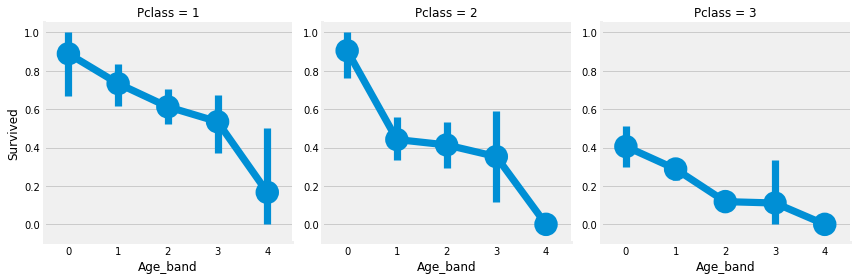

In [36]:
#Visualize the feature 'Age_band' in relation to the target label 'Survived'
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

#### 'SinSP', 'Parch' feature:

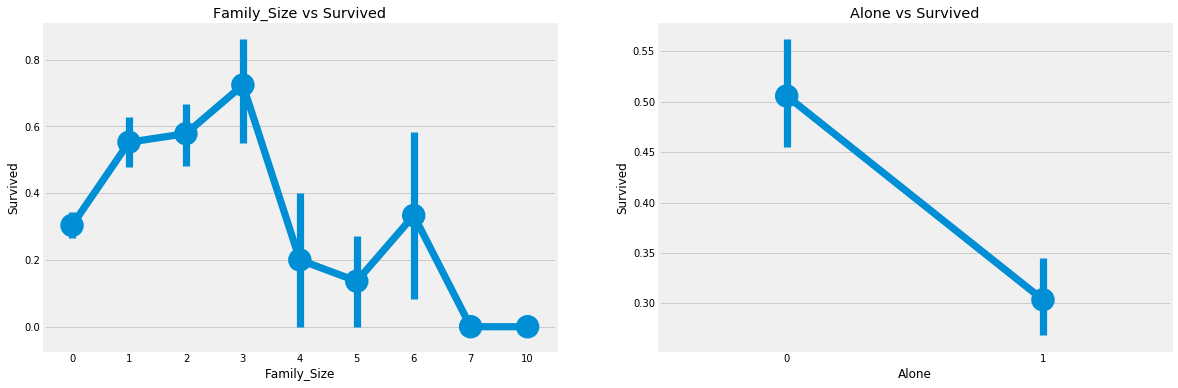

In [37]:
#Feature engineering: merge 'SibSP' and 'Parch'
#Create a new feature 'Family_size'
#Create a new feature 'Alone' 
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1 

f,ax=plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_Size','Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

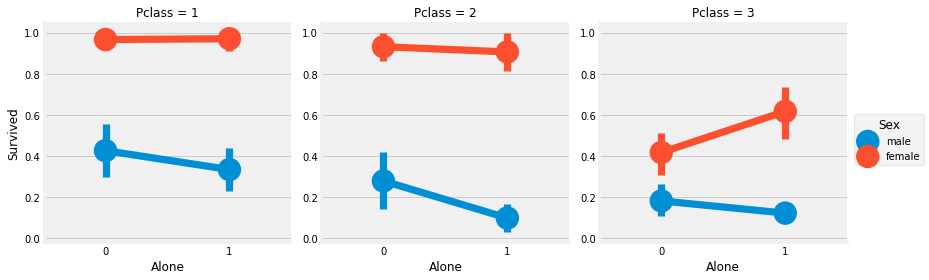

In [38]:
#Visualize the feature 'Alone' in realtion to the target label 'Survived'
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

#### 'Fare' feature
- 먼저 'Fare'를 평균값에 따라 4 범위로 나눈다.('Fare_range')
- 그 후, 'Fare_range'에 따라 카테고리 숫자로 분류한다.

In [39]:
#Feature engineering: convert the continuous feature 'Fare' to a categorial feature to set the range of fare
#Create a new feature 'Fare_range'
data['Fare_Range'] = pd.qcut(data['Fare'], 4) #divide into four groups
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [40]:
#based on the range of the feature 'Fare_range', create a new categorial feature 'Fare_cat'
data['Fare_cat']=0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

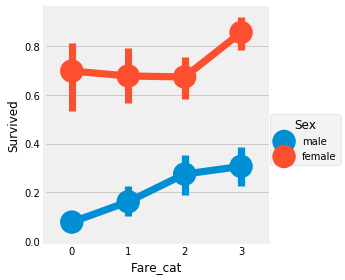

In [41]:
#Visualize the feature 'Fara_cat'
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

#### 'Sex', 'Embarked', 'Initial' features: string을 숫자로 바꾼다

In [42]:
#Feature engineering: convert the categorial features' string to number
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

#### 사용하지 않는 feature 제거

In [43]:
#Drop meaningless features
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

#### 최종

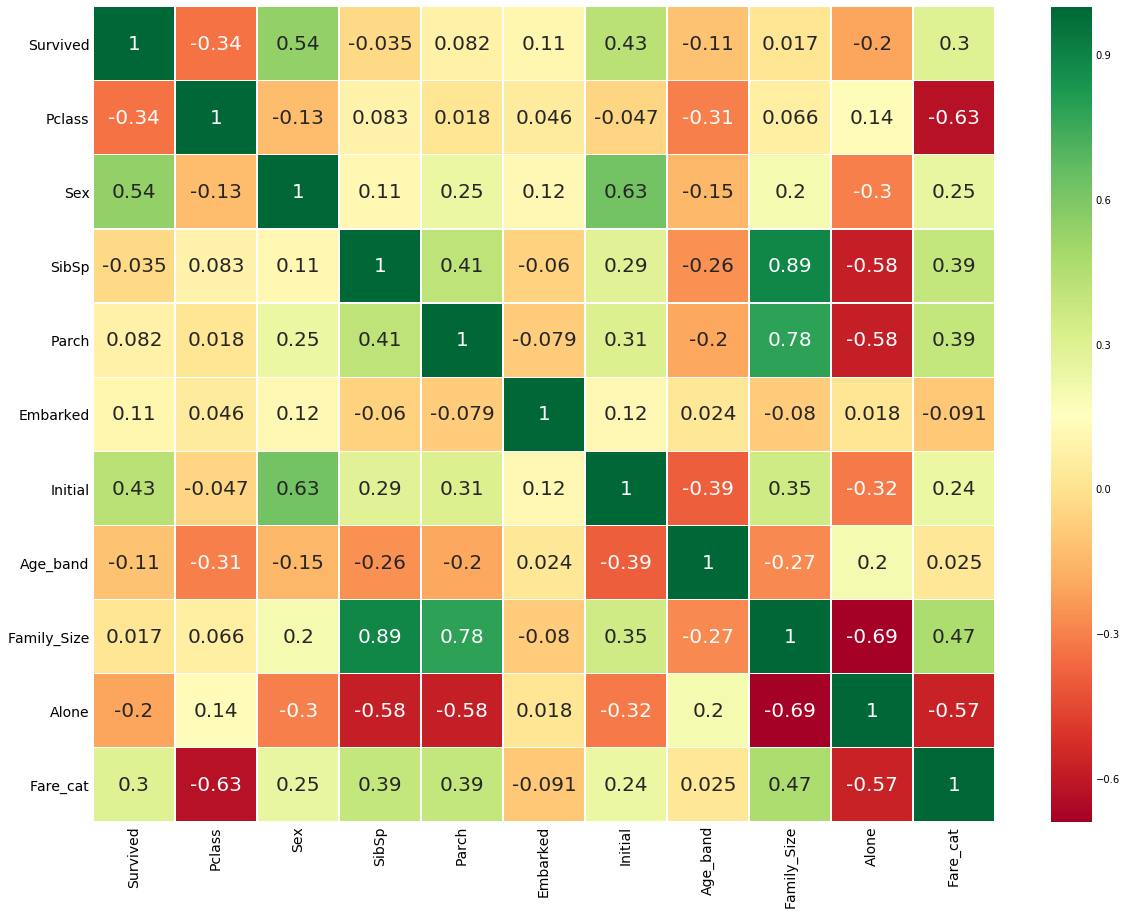

In [44]:
#Visualize the correlation of the features after feature engineering
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig=plt.gcf()
fig.set_size_inches(18, 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## 3. Predictive Modeling
다음의 머신러닝 모델들을 각각 사용한다.
- Logistic Regression
- Support Vector Machines(radial)
- Support Vector Machines(linear)
- Random Forest
- K-Nearest Neighbours
- Naive Bayes
- Decision Tree
- Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import svm #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbours
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

#### Data preparation

In [46]:
#Split the training and test data set
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

In [47]:
#Logistic Regression modeling
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(f"Logistic Regression accuracy: {metrics.accuracy_score(prediction3,test_Y)}")

Logistic Regression accuracy: 0.8171641791044776


In [48]:
#Support Vector Machine(rbf) modeling
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print(f"rbf SVM accuracy: {metrics.accuracy_score(prediction1, test_Y)}")

rbf SVM accuracy: 0.835820895522388


In [49]:
#Support Vector Machine(linear) modeling
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print(f"linear SVM accuracy: {metrics.accuracy_score(prediction2,test_Y)}")

linear SVM accuracy: 0.8171641791044776


In [50]:
#Decision Tree modeling
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print(f"Decision Tree accuracy: {metrics.accuracy_score(prediction4,test_Y)}")

Decision Tree accuracy: 0.8022388059701493


In [51]:
#K-Nearest Neighbours modeling
model=KNeighborsClassifier() 
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print(f"KNN accuracy: {metrics.accuracy_score(prediction5,test_Y)}")

KNN accuracy: 0.832089552238806


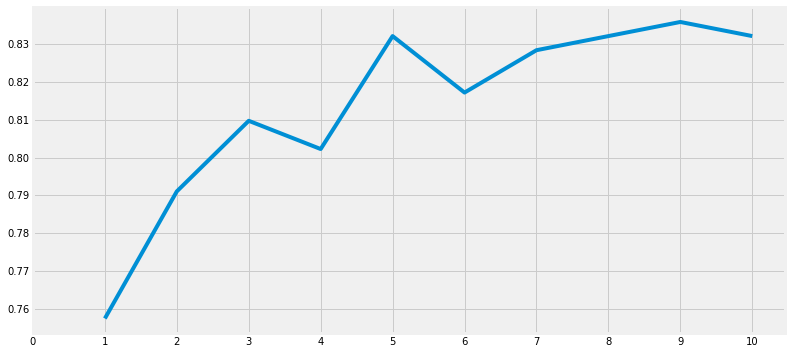

Accuracies: [ 0.75746269  0.79104478  0.80970149  0.80223881  0.83208955  0.81716418
  0.82835821  0.83208955  0.8358209   0.83208955]
Maximum accuracy: 0.835820895522388


In [52]:
#Check how the KNN model accuracy changes based on the value of N
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)

fig=plt.gcf()
fig.set_size_inches(12,6)

plt.show()

print(f"Accuracies: {a.values}")
print(f"Maximum accuracy: {a.values.max()}")

In [53]:
#Naive Bayes modeling
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print(f"Naive Bayes accuracy: {metrics.accuracy_score(prediction6, test_Y)}")

Naive Bayes accuracy: 0.8134328358208955


In [54]:
#Random Forest modeling
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print(f"Random Forest accuracy: {metrics.accuracy_score(prediction7, test_Y)}")

Random Forest accuracy: 0.8134328358208955


- The accuracy can be changed with different training and test data
- Cross validation is required to fix model variance

In [55]:
#Cross validation: K-Fold Cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [56]:
kfold = KFold(n_splits=10, random_state=22)#n=10

classifiers = ['Linear Svm', \
               'Radial Svm', \
               'Logistic Regression', \
               'KNN', \
               'Decision Tree', \
               'Naive Bayes', \
               'Random Forest']

models = [svm.SVC(kernel='linear'), \
          svm.SVC(kernel='rbf'), \
          LogisticRegression(), \
          KNeighborsClassifier(n_neighbors=9), \
          DecisionTreeClassifier(), \
          GaussianNB(), \
          RandomForestClassifier(n_estimators=100)]

xyz = list()
std = list()
accuracy = list()
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)       

new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.805868,0.027738
Naive Bayes,0.801386,0.028999
Random Forest,0.815980,0.034966


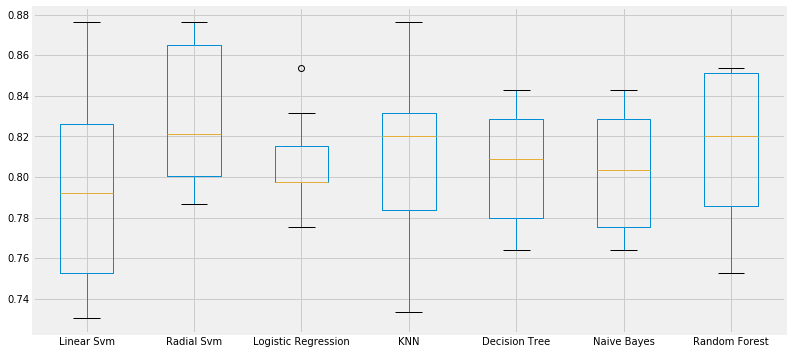

In [57]:
#Visualize the cross validation result
plt.subplots(figsize=(12, 6))
box=pd.DataFrame(accuracy, index=[classifiers])

box.T.boxplot()

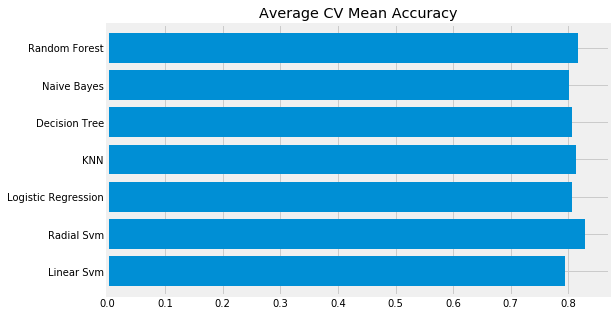

In [58]:
#Visualize the cross validation result
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.show()

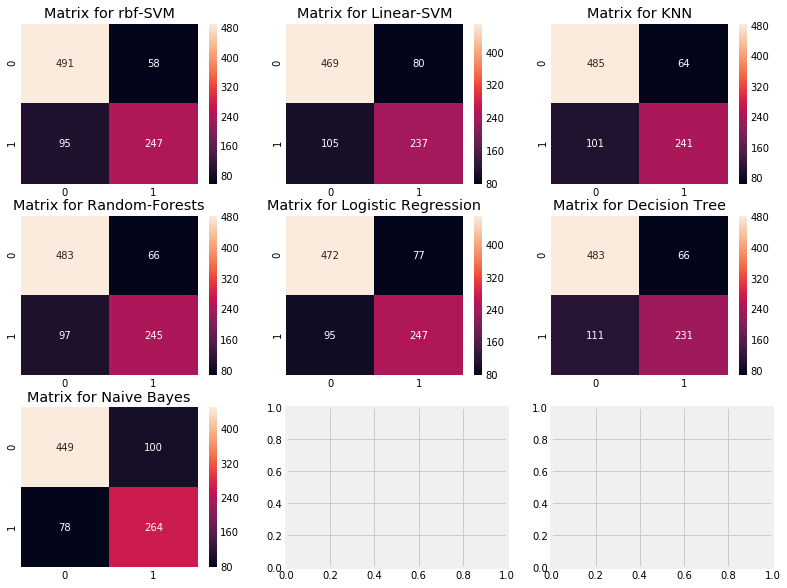

In [59]:
#Visualize the seven models
f, ax = plt.subplots(3, 3, figsize=(12, 10))


y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

For each heat maps
- The first and fourth quadrants show correct predictions
- The second and third quadrants show incorrect predictions.

- rbf-SVM and Random forest predict precisely than other models

## 4. Hyper-Parameters Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Paramter tuning for rbf-SVM
C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

kernel=['rbf', 'linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma}

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   15.6s finished


In [62]:
#Paramter tuning for Randome forest
n_estimators=range(100, 1000, 100)
hyper={'n_estimators': n_estimators}

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   20.1s finished


0.817059483726
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


## 5. Ensembling

In [63]:
#Ensembling: voting classifier
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)), \
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)), \
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)), \
                                              ('LR',LogisticRegression(C=0.05)), \
                                              ('DT',DecisionTreeClassifier(random_state=0)), \
                                              ('NB',GaussianNB()), \
                                              ('svm',svm.SVC(kernel='linear',probability=True))], voting='soft').fit(train_X, train_Y)
print(f"Accuracy of ensembled(VotingClassifier) models: {ensemble_lin_rbf.score(test_X, test_Y)}")

cross=cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print(f"Cross validation score of ensembled(VotingClassifier) models: {cross.mean()}")

Accuracy of ensembled(VotingClassifier) models: 0.8246268656716418
Cross validation score of ensembled(VotingClassifier) models: 0.8237660310974917


In [64]:
#Ensembling: Bagging
from sklearn.ensemble import BaggingClassifier

In [65]:
#Ensembling: Bagging: KNN
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)

prediction=model.predict(test_X)
print(f"Accuracy of ensembled(bagged) KNN: {metrics.accuracy_score(prediction,test_Y)}")

result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f"Cross validation score of ensembled(bagged) KNN: {result.mean()}")

Accuracy of ensembled(bagged) KNN: 0.835820895522388
Cross validation score of ensembled(bagged) KNN: 0.8148893428668709


In [66]:
#Ensembling: Bagging: decision tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X,train_Y)

prediction=model.predict(test_X)
print(f"Accuracy of ensembled(bagged) decision tree: {metrics.accuracy_score(prediction,test_Y)}")

result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print(f"Cross validation score of ensembled(bagged) decision tree: {result.mean()}")

Accuracy of ensembled(bagged) decision tree: 0.8246268656716418
Cross validation score of ensembled(bagged) decision tree: 0.8204826353421859


In [67]:
#Ensembling: Boosting: AdaBosst
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')

print(f"Cross validation score of ensembled(AdaBosst) models: {result.mean()}")

Cross validation score of ensembled(AdaBosst) models: 0.8249526160481218


In [68]:
#Ensembling: Boosting: Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')

print(f"Cross validation score of ensembled(Gradient Boosting) models: {result.mean()}")

Cross validation score of ensembled(Gradient Boosting) models: 0.8182862331176939


In [69]:
#Ensembling: Boosting: XGBoost
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')

print(f"Cross validation score of ensembled(XGBoost) models: {result.mean()}")

Cross validation score of ensembled(XGBoost) models: 0.8104710021563954


    - Perform Hyper-Parameter tuning for AdaBoost

In [70]:
#Hyper parater tuning for AdaBoost
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  5.2min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


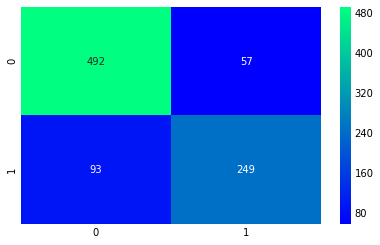

In [71]:
#Visualize the AdaBoost prediction result
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')

plt.show()

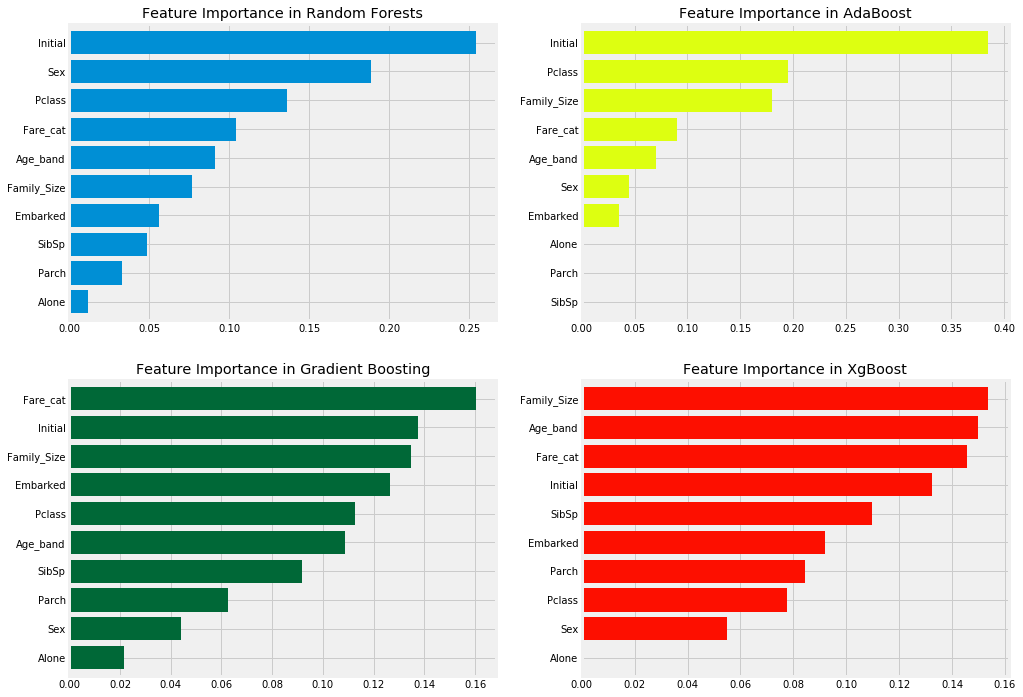

In [72]:
#Feature importance
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')

plt.show()